# Importing libraries and loading the data

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Network project/multi_data.csv")  
data.head()

,Unnamed: 0,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,0,-0.717045,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,...,0,1,0,4,0,0,0,0,1,normal
1,1,-0.620982,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,...,0,1,0,4,0,0,0,0,1,normal
2,2,0.339648,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,...,0,0,0,0,1,0,0,0,0,Dos
3,3,-0.690846,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,...,0,1,0,4,0,0,0,0,1,normal
4,4,-0.472521,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,...,0,1,0,4,0,0,0,0,1,normal


In [ ]:
data.shape

(125973, 101)

In [ ]:
labels = data["label"].unique()
labels

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [ ]:
data.isnull().sum().to_frame()

,0
Unnamed: 0,0
count,0
logged_in,0
srv_serror_rate,0
serror_rate,0
...,...
Probe,0
R2L,0
U2R,0
normal,0


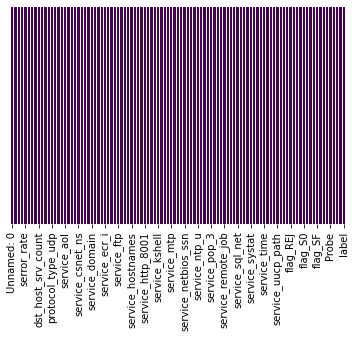

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **1 - Multi Layer Perceptron Classifier**

In [ ]:
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [ ]:
data.shape

(125973, 101)

In [ ]:
X = data.iloc[:,0:95]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [ ]:
print(X.shape)
print(Y.shape)

(125973, 95)
(125973, 5)


In [ ]:
# Preparing the data 

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) # splitting the dataset 75% for training and 25% testing


In [ ]:
print(X_train.shape)
print(y_train.shape)

(94479, 95)
(94479, 5)


In [ ]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# summary of model layers
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                4800      
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 5,055
Trainable params: 5,055
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 2590.3672 - accuracy: 0.4041 - val_loss: 1304.2592 - val_accuracy: 0.0899
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 498.9052 - accuracy: 0.3677 - val_loss: 91.6488 - val_accuracy: 0.5409
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 123.5262 - accuracy: 0.4483 - val_loss: 98.4220 - val_accuracy: 0.3743
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 93.6121 - accuracy: 0.4065 - val_loss: 122.3791 - val_accuracy: 0.5409
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 84.6285 - accuracy: 0.4660 - val_loss: 138.5852 - val_accuracy: 0.1003
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 130.7272 - accuracy: 0.4416 - val_loss: 141.9890 - val_accuracy: 0.5437
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 109.3173 - accuracy: 0.4375 - val_loss: 108.1056 - va

In [ ]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 1s 849us/step - loss: 11.1513 - accuracy: 0.8675
Test results - Loss: 11.1513090133667 - Accuracy: 86.7530345916748%


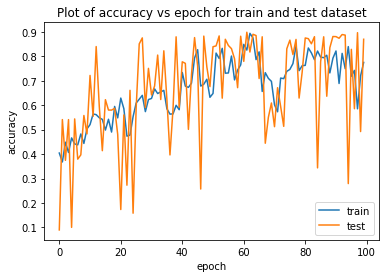

In [ ]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('/mlp_multi_accuracy.png')
plt.show()

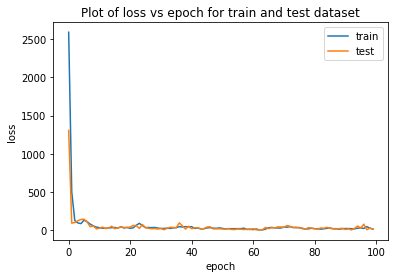

In [ ]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('/mlp_multi_loss.png')
plt.show()

# **2 -  Support Vector Machine Classifier**

In [ ]:
from sklearn.preprocessing import LabelEncoder

db = data["label"].to_frame()
le = LabelEncoder()
encoded_series = db.apply(le.fit_transform)

In [ ]:
# Preparing the data 


X = data.iloc[:,1:85]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = encoded_series["label"] # target attributes

In [ ]:
# apply the min-max scaling in Pandas using the .min() and .max() methods

def min_max_scaling(df):
  
    df_norm = df.copy()
    
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm
    
# calling the min_max_scaling function

X = min_max_scaling(X)

X.head()

,count,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,...,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ
0,0.003914,0.0,0.0,0.0,0.00,0.17,0.00,0.098039,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.025440,0.0,0.0,0.0,0.00,0.00,0.00,0.003922,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.240705,0.0,1.0,1.0,1.00,0.10,1.00,0.101961,0.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.009785,1.0,0.2,0.2,0.03,1.00,0.01,1.000000,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.058708,1.0,0.0,0.0,0.00,1.00,0.00,1.000000,1.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) # splitting the dataset 75% for training and 25% testing

In [ ]:
# SVM model creation




svclassifier = SVC(
    kernel='linear'
    ) 

svclassifier.fit(X_train, y_train)  # training model on training dataset

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(X_test)
ac = accuracy_score(y_test, y_pred)*100

print("Support vector Classifier accuracy is", ac)

Support vector Classifier accuracy is 94.58309519273513


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11484
           1       0.85      0.78      0.81      2947
           2       0.43      0.01      0.02       274
           3       0.00      0.00      0.00        15
           4       0.96      0.98      0.97     16774

    accuracy                           0.95     31494
   macro avg       0.64      0.55      0.55     31494
weighted avg       0.94      0.95      0.94     31494



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confusion matrix

cm = confusion_matrix(y_pred, y_test)
cm

array([[10985,   498,     0,     0,    87],
       [  236,  2291,     0,     0,   174],
       [    0,     0,     3,     0,     4],
       [    0,     0,     0,     0,     0],
       [  263,   158,   271,    15, 16509]])

## Validation curve - SVM

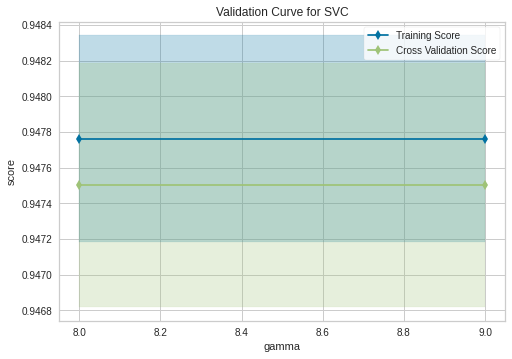

In [ ]:
# from sklearn.model_selection import validation_curve
from yellowbrick.model_selection import validation_curve 


# Plot the validation curve
viz = validation_curve(svclassifier, X_train, y_train, param_name="gamma",
                      param_range=np.arange(8, 10), scoring="accuracy")

# Fit and show the visualizer
viz.fit(X_train, y_train)        
viz.score(X_test, y_test)
viz.show()

## Learning curve - SVM

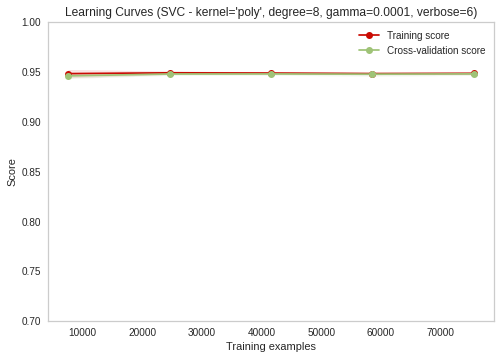

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X_train, y_train, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt






title = "Learning Curves (SVC - kernel='linear')"

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear')
plot_learning_curve(estimator, title, X_train, y_train, (0.7, 1), cv=cv)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


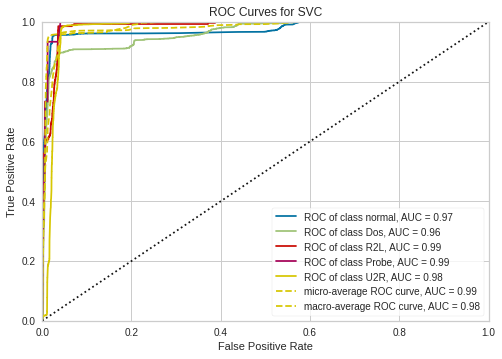

In [ ]:
from yellowbrick.classifier import ROCAUC

   
visualizer = ROCAUC(svclassifier, classes=['normal', 'Dos', 'R2L', 'Probe', 'U2R'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

# **3 - Random Forest Classifier**

In [ ]:
# random forest model creation
rfc = RandomForestClassifier(
    random_state = 2, n_estimators = 100, max_depth = 8
)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=2)

In [ ]:
rfc_predict = rfc.predict(X_test)

ac = accuracy_score(y_test, rfc_predict)*100

print("Random Forest Classifier accuracy is ", ac)

Random Forest Classifier accuracy is  96.9994284625643


In [ ]:
# classification report
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     11484
           1       0.96      0.90      0.93      2947
           2       0.00      0.00      0.00       274
           3       0.00      0.00      0.00        15
           4       0.96      1.00      0.98     16774

    accuracy                           0.97     31494
   macro avg       0.58      0.57      0.58     31494
weighted avg       0.96      0.97      0.97     31494



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# confusion matrix

cm = confusion_matrix(rfc_predict, y_test)
cm

array([[11184,    50,     1,     0,    10],
       [   41,  2659,     0,     0,    58],
       [    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0],
       [  259,   238,   273,    15, 16706]])

## Validation curve - Random Forest



In this plot you can see the training scores and validation scores of an machine learning model



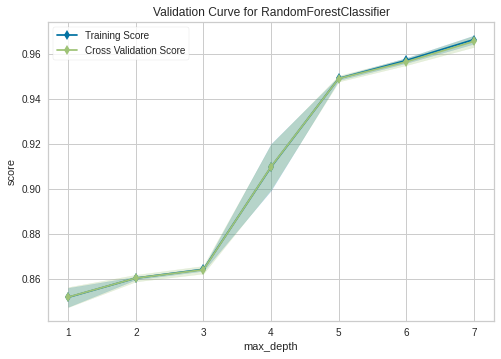

In [ ]:
# from sklearn.model_selection import validation_curve
from yellowbrick.model_selection import validation_curve 



# Plot the validation curve
viz = validation_curve(rfc, X_train, y_train, param_name="max_depth", n_jobs=-1,
                      param_range=np.arange(1, 8), cv=10, scoring="accuracy")

# Fit and show the visualizer
viz.fit(X_train, y_train)        
viz.score(X_test, y_test)
viz.show()

## Learning curve - Random Forest

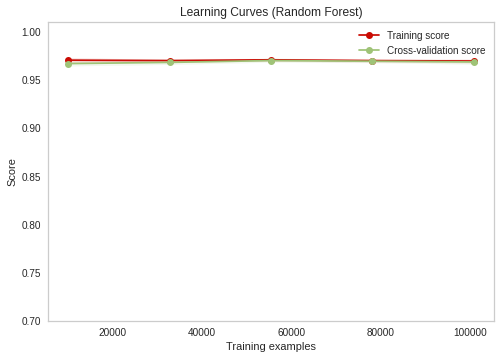

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, Y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt






title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(random_state = 2, n_estimators = 8, max_depth = 8)
plot_learning_curve(estimator, title, X, Y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


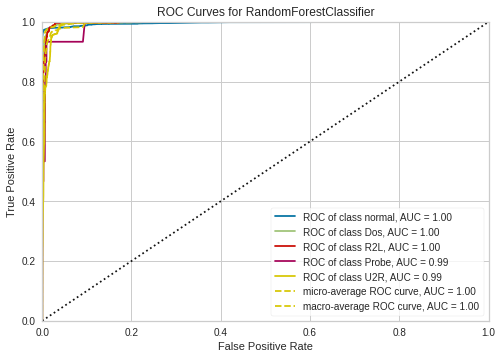

In [ ]:
from yellowbrick.classifier import ROCAUC

   
visualizer = ROCAUC(rfc, classes=['normal', 'Dos', 'R2L', 'Probe', 'U2R'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure